# Question_4: Plot the number of stations per city in function of number of inhabitants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    r'C:\users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\facilities.csv', sep=',')

df['city'] = df['city'].str.upper() #gezien je excel in hoofdletters staat, ga je je stations ook in hoofdletters zetten

df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\users\\Annelien\\Documents\\SCHOOL\\ACRM\\Project NMBS\\group7-group-assignment-\\Data\\facilities.csv'

In [70]:
df = df.sort_values(by='city').groupby('city').size().reset_index(name = 'NumberOfStations')
# Ik sorteer eerst op stations & groepeer deze ook op stations
# ik bekijk heet aantal stations per stad en steek deze in nieuwe kolom NumberOfStations

In [71]:
dg = pd.read_excel(r'C:\Users\Annelien\Documents\SCHOOL\ACRM\Project NMBS\group7-group-assignment-\Data\BevolkingscijfersPergemeente.xlsx')
dg.head(5)

,Niscode,Gemeente,mannen,vrouwen,totaal
0,11001.0,AARTSELAAR,7334,7438,14772
1,11002.0,ANTWERPEN,270078,268477,538555
2,11004.0,BOECHOUT,6728,7084,13812
3,11005.0,BOOM,9545,9605,19150
4,11007.0,BORSBEEK,5498,5834,11332


In [72]:
dfsamen = pd.merge(df, dg, left_on='city', right_on='Gemeente', how='inner')  #we mergen met stad, aantal stations voor deze stad & aantal inwoners per stad
dfsamen = dfsamen[['city','NumberOfStations','totaal']]   #we houden deze 3 kolommen over
dfsamen.head(5)

,city,NumberOfStations,totaal
0,AALST,2,89870
1,AALTER,1,29517
2,AARSCHOT,2,30807
3,AISEAU-PRESLES,1,10926
4,ALKEN,1,11885


In [73]:
#we maken een dictionary: koppels maken: key + value
#we maken een x ranges van x tot x aantal inwoners

d = {range(1,999): '1-999', range(1000,9999): '1000-9999', range(10000,99999): '10000-99999', range(100000,999999): '100000-999999', range(1000000,9999999): '1000000-9999999'}

#elke city wordt ingedeeld per categorie ( loopachtig via lambda functie )
dfsamen['categorie'] = dfsamen['totaal'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
dfsamen

,city,NumberOfStations,totaal,categorie
0,AALST,2,89870,10000-99999
1,AALTER,1,29517,10000-99999
2,AARSCHOT,2,30807,10000-99999
3,AISEAU-PRESLES,1,10926,10000-99999
4,ALKEN,1,11885,10000-99999
...,...,...,...,...
221,ZELE,1,21331,10000-99999
222,ZONHOVEN,1,21657,10000-99999
223,ZOTTEGEM,1,27617,10000-99999
224,ZWALM,1,8280,1000-9999


In [74]:
dfsamen = dfsamen.sort_values(by=['categorie','NumberOfStations']).groupby(['categorie','NumberOfStations']).size().reset_index(name='aantal')
#aantal = aantal gemeentes met x aantal station in categorie x
dfsamen.head(5)

,categorie,NumberOfStations,aantal
0,1000-9999,1,35
1,1000-9999,2,4
2,1000-9999,3,1
3,10000-99999,1,139
4,10000-99999,2,30


In [75]:
#pivot: Kolom Number of stations wordt nu rij 1 &
# uw categorie verschijnt maar 1 keer meer
#index = kolom '0'
#columns = NumberOfStations

dfsamen = dfsamen.pivot_table(index=['categorie'], columns = ['NumberOfStations'], values = ['aantal'], fill_value = 0, aggfunc = 'sum')
dfsamen.head(5)

,1,2,3,4,5,7
categorie,,,,,,
1000-9999,35,4,1,0,0,0
10000-99999,139,30,9,0,1,0
100000-999999,2,2,1,1,0,1


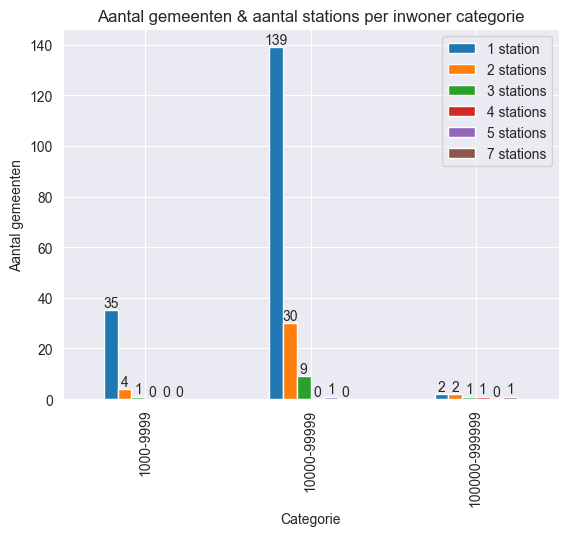

In [81]:
ax = dfsamen.plot.bar()
for container in ax.containers:
    ax.bar_label(container)

ax.legend(['1 station', '2 stations', '3 stations', '4 stations', '5 stations', '7 stations'])
plt.title('Aantal gemeenten & aantal stations per inwoner categorie')
plt.ylabel('Aantal gemeenten')
plt.xlabel('Categorie')
plt.show()